In [34]:
import matplotlib.pyplot as plt
import matplotlib as plot
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [3]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [4]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [5]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [27]:
def cross_validation(x_train_, y_train_, k=5):
    rng = np.random.default_rng()
    n_samples = x_train_.shape[0]
    result = []
    index = np.arange(n_samples)
    rng.shuffle(index)
    idx = 0
    splits = []
    for _ in range(n_samples % k):
        step = n_samples // k + 1
        splits.append(index[idx:idx+step])
        idx += step
    for _ in range(k - n_samples % k):
        step = n_samples // k
        splits.append(index[idx:idx+step])
        idx += step
    for ii in range(k):
        result.append([np.concatenate([z for j, z in enumerate(splits) if j != ii]), splits[ii]])
    return result

In [28]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 folds of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divided by K

## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  4  5  7  8  9 10 11 13 14 15 16 18 19], Validation index: [ 3  6 12 17]
Split: 2, Training index: [ 2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19], Validation index: [0 1 7 8]
Split: 3, Training index: [ 0  1  3  5  6  7  8  9 10 11 12 13 16 17 18 19], Validation index: [ 2  4 14 15]
Split: 4, Training index: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 17], Validation index: [ 5 16 18 19]
Split: 5, Training index: [ 0  1  2  3  4  5  6  7  8 12 14 15 16 17 18 19], Validation index: [ 9 10 11 13]


In [7]:
assert len(kfold_data) == 5 # should contain 5 folds of data
assert len(kfold_data[0]) == 2 # each element should contain index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divided by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [31]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [30]:
## your code
gammas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
Cs = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
results = np.zeros((len(Cs), len(gammas)))
kfold_data = cross_validation(x_train, y_train)

for i, C in enumerate(Cs):
    for j, gamma in enumerate(gammas):
        scores = []
        for data in kfold_data:
            clf_ = SVC(C=C, kernel='rbf', gamma=gamma)
            test_ = data[0]
            val_ = data[1]
            clf_.fit(x_train[test_, :], y_train[test_])
            scores.append(accuracy_score(y_train[val_], clf_.predict(x_train[val_])))
        results[i, j] = sum(scores) / len(scores)
        # print(scores)


[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.9742857142857143, 0.9685714285714285, 0.9735714285714285, 0.9728571428571429, 0.9807142857142858]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]
[0.47285714285714286, 0.5, 0.485, 0.4992857142857143, 0.49714285714285716]

In [45]:
arg = np.argmax(results)
best_parameters = [Cs[arg // len(gammas)], gammas[arg % len(gammas)]]
print(best_parameters)

[1.0, 0.0001]


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

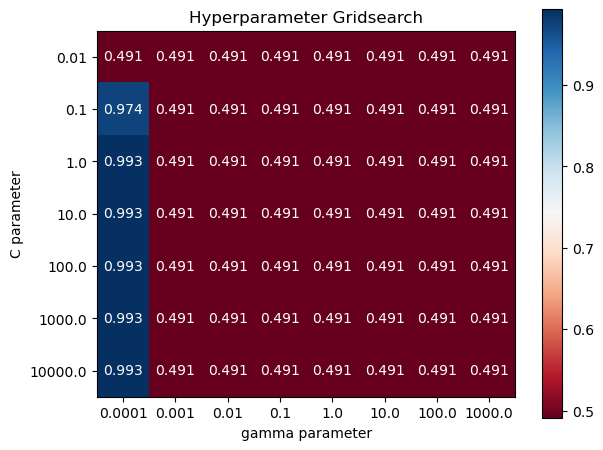

In [52]:
ax = plt.gca()
cmap = plot.cm.get_cmap("RdBu")
im = ax.imshow(results, interpolation='nearest', cmap=cmap)
for i in range(len(Cs)):
    for j in range(len(gammas)):
        t = "{:.3}".format(results[i, j])
        ax.text(j, i, t, horizontalalignment='center', verticalalignment='center', c='w')
ax.set_xticks(range(len(gammas)))
ax.set_xticklabels(gammas)
ax.set_yticks(range(len(Cs)))
ax.set_yticklabels(Cs)
plt.colorbar(im, ax=ax)
plt.xlabel("gamma parameter")
plt.ylabel("C parameter")
plt.title("Hyperparameter Gridsearch")
ax.get_figure().tight_layout()
plt.savefig("res.png")
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [ ]:
best_model = SVC(C=best_parameters[0], kernel='rbf', gamma=best_parameters[1])

y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))